# **Titanic Data Analysis**

### **import all required libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **import data using pandas**

In [9]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **Clean the Data**

**step-1** : check any null or duplicate values is there or not

In [12]:
null=df.isnull().sum()
dup=df.duplicated().sum()
print("duplicates:",dup)
print("null values:",null)

duplicates: 0
null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


***So there is no duplicate values**                                                                                 
***And there are Null values in age and cabin and embarked column we can drop beacause most of the values are null**

In [14]:
df.fillna(df['Age'].mean(),inplace=True)
df.fillna(df['Embarked'].mode(),inplace=True)
#Drop the cabin table due to high null values
df.drop('Cabin',axis=1,inplace=True)

**After Cleaning The Data**

In [16]:
null=df.isnull().sum()
dup=df.duplicated().sum()
print("duplicates:",dup)
print("null values:",null)

duplicates: 0
null values: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Check the Data Types**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
#change age into [int] datatype
df['Age']=df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


## Exploratory Data Analysis

### **Statistics**

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Use .value_count() to count unique values in a column**

In [25]:
sex=df['Sex'].value_counts()
print(sex)
survival=df['Survived'].value_counts()
print(survival)

Sex
male      577
female    314
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


**From above there are 577 males and 314 females are there**                                         
**And 549 peoples are died and 342 peoples are alive**

**1.Survived Count**

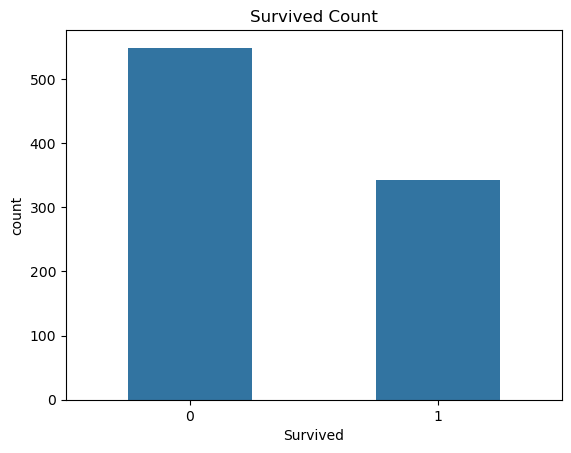

In [28]:
sns.countplot(x='Survived',data=df,width=0.5)
plt.title('Survived Count')
plt.show()

**2.Pclass Distribution**

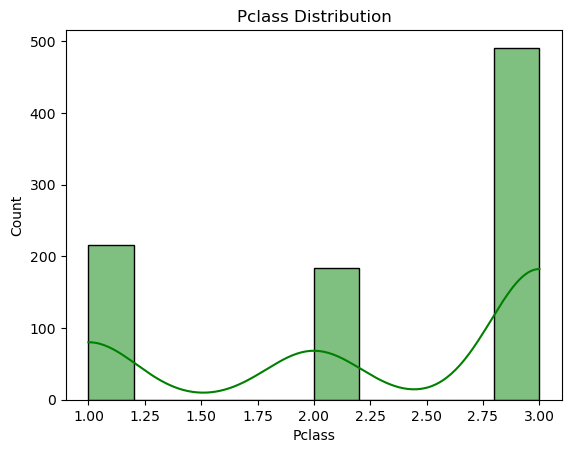

In [30]:
sns.histplot(x="Pclass",bins=10,data=df,kde=True,color='g')
plt.title("Pclass Distribution")
plt.show()

**3.Survival By Sex**

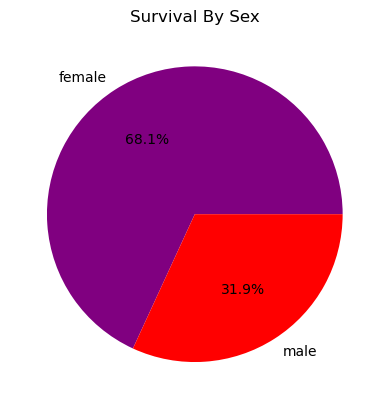

In [32]:
data=df.groupby('Sex')['Survived'].sum().reset_index()
plt.pie(data["Survived"],labels=data["Sex"],autopct='%1.1f%%',colors=['purple','red'])
plt.title('Survival By Sex')
plt.show()

**4.Age Vs Survival**

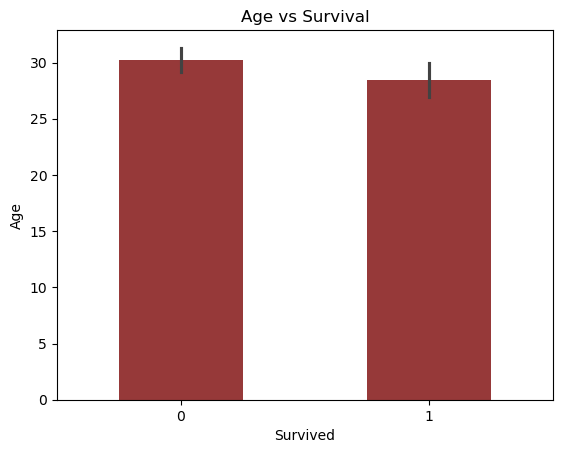

In [34]:
sns.barplot(x="Survived", y="Age", data=df,width=0.5,color="brown")
plt.title("Age vs Survival")
plt.show()


**5.Scatter Plot(Age Vs Fare)**

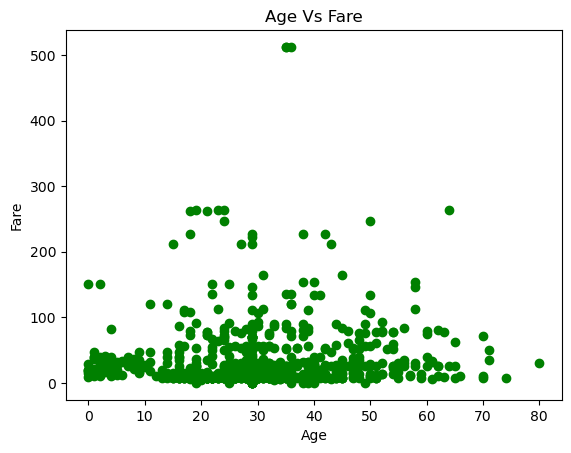

In [36]:
plt.scatter(df['Age'],df['Fare'],color='g')
plt.title("Age Vs Fare")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**6.Box Plot**

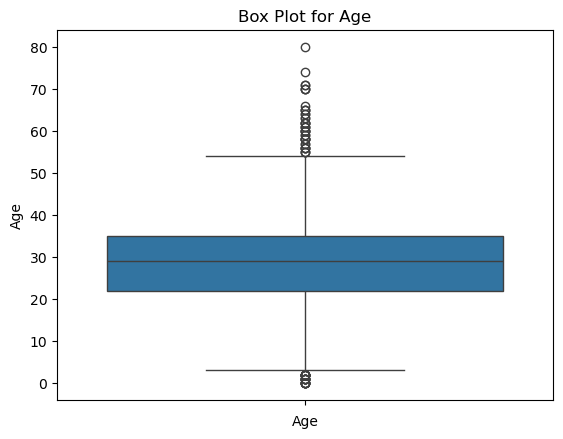

In [38]:
sns.boxplot(df['Age'])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

**7.Pair plot for age,fare,pclass and survived**

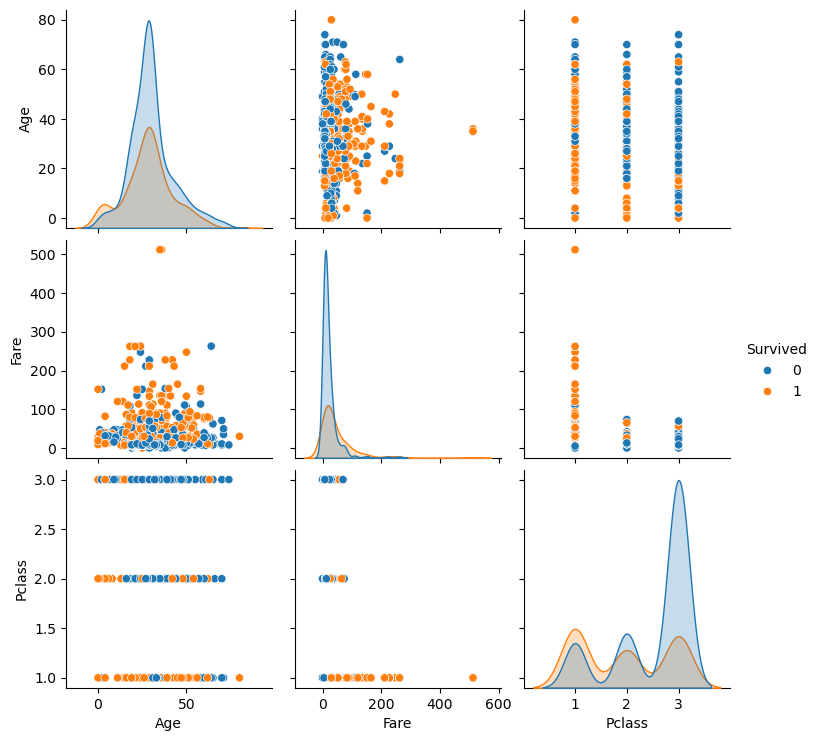

In [40]:
data=['Age','Fare','Pclass','Survived']
sns.pairplot(df[data],hue='Survived',diag_kind='kde')
plt.show()

**8.Correlation Analysis**

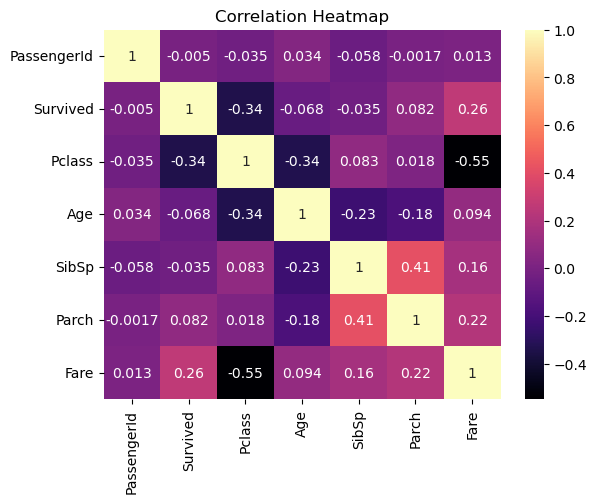

In [42]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma")
plt.title("Correlation Heatmap")
plt.show()

### **Conclusion**                                                                              
**Key Insights
Females had a higher survival rate.

1st class passengers had better chances of survival.

Younger passengers had slightly higher survival rates.

Strong correlation between Pclass and Fare

And 549 peoples are died and 342 peoples are alive